In [2]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import pandas as pd


In [3]:
Data = pd.read_csv('SNData - Sheet1.csv')
Data

,logcz,mmax
0,3.958,16.4090
1,4.066,17.3488
2,4.223,17.8124
3,3.992,16.3683
4,4.137,17.2548
5,3.897,16.2426
6,3.891,16.2164
7,4.481,19.0955
8,3.774,15.4026
9,4.240,17.7777


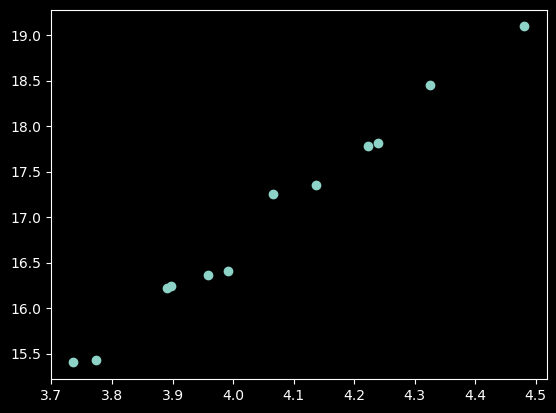

In [4]:
x = np.sort(Data['logcz'])
y = np.sort(Data['mmax'])
plt.plot(x, y ,ls='', marker='o');
#plt.plot(Data['logcz'][0:1],Data['mmax'][0:1]);

In [5]:
from lmfit.models import LinearModel
def line_fit_and_plot(xdata, ydata, yerr=None, model=LinearModel()):
    param_guess = model.guess(ydata, x=xdata)
    if (yerr is None):
        model_fit = model.fit(ydata, param_guess, x=xdata)
    else:
        model_fit = model.fit(ydata, param_guess, x=xdata, weights=1/yerr)
    print(model_fit.fit_report(show_correl=False))
    model_fit.plot();
    return model_fit.params

def get_uslope(params):
    return unc.ufloat(params['slope'].value, params['slope'].stderr)
def get_uint(params):
    return unc.ufloat(params['intercept'].value,params['intercept'].stderr)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 12
    # variables        = 2
    chi-square         = 0.17327142
    reduced chi-square = 0.01732714
    Akaike info crit   = -46.8536317
    Bayesian info crit = -45.8838184
    R-squared          = 0.98836525
[[Variables]]
    slope:      5.08228774 +/- 0.17437293 (3.43%) (init = 5.082288)
    intercept: -3.65006175 +/- 0.70898765 (19.42%) (init = -3.650062)


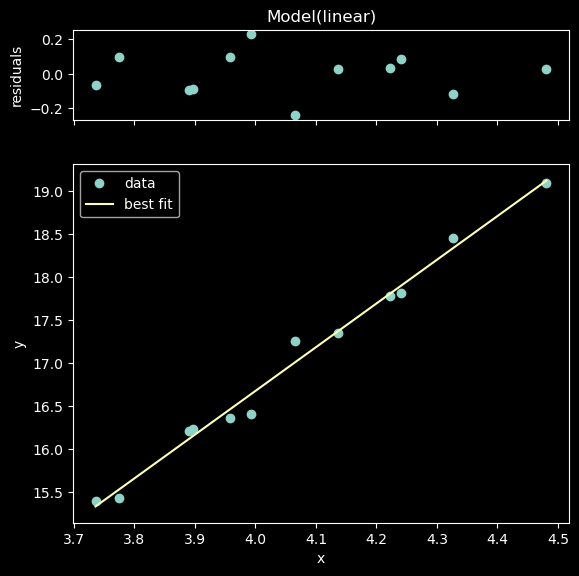

In [6]:
lineFit = line_fit_and_plot(x,y,yerr=None, model=LinearModel())
m = get_uslope(lineFit)
b = get_uint(lineFit)

b) If $cz = v$ and $v=H_{0}d$ then we can substitude and solve for d in terms of the Hubble Constant and redshift. Getting $d = \frac{cz}{H_{0}}$ we can then put it into the formula $m-m_{max} = 5 \log_{10}\frac{cz}{H_{0}}-5$ in this instance $log_{10}\frac{cz}{H_{0}}$ is our x, and $m_{max}$ is our y, all else being constant can be factored into our y intercept and so 5 is our slope. This does also assume that z<<1

c) Using the above equation we find that $m_{0} = m-5$ which equals -3.65 as seen in the above plot.

d) Many factors can go into individual supernova not lying directly on the line. Such as dust obscuring the individual supernova, observational bias, and gravitational lensing. All these supernova have different factors that effect their brightness individually and cause each of them to have error bars. Additionally the supernova may come from different systems, some may come from individual systems, others from binaries, some may be different types as well all which can cause the brightness to deviate slightly from the slope.

e) The b_LMC value is around 17 and the slope a is -3 from the graph
f) m=alog(P)+b_LMC m=M+18.5 We know b_LMC = 17 so when we solve these we get M_c = alog(P)+M_0 where a is around 17 and M_0 is ~ -1.5
g) b_NGC 4639 is roughly 30.5
h) m - M_c = 32 we assume that all Cepheids in the region have the same apparent magnitude and that they all follow the same slope which is not necessarily true.
i) 12.61 - M_c = 32 so M_c is -19.39
j) m_0 = -3.65 so 5log(10^4) - 3.65 = m_max gives us 16.35
m-M = 5 log(d)+25 and m = 16.35 and M is -19.39 so we get 10^[(16.35+19.39-25)/5] which results in 140.6
k) H_0 = cz/d where cz is 10^4 and d is 140.6 so H_0 is around 71.43
l) If you consider the variables in the hubble constant we either have an undefined redshift or a poorly defined distance. Due to the distance being measured by the brightness of the objects then you could end up with a brightness that is poorly defined as it is obscused by dust, brightened by lensing, or incorrect due to instrumentation so there are many sources of uncertainty.

In [7]:
Data2 = pd.read_csv('SNData - Sheet2.csv')
Data2

,logcz,mmax
0,5.158,23.24
1,5.111,22.78
2,5.270,23.76
3,5.233,23.58
4,4.954,21.74
5,5.057,22.96
6,5.111,23.09
7,5.121,23.01
8,5.176,23.45
9,5.464,25.05


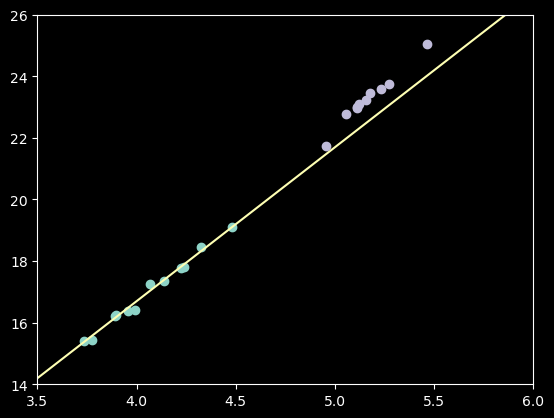

In [27]:
fig, ax = plt.subplots()
x = np.sort(Data['logcz'])
y = np.sort(Data['mmax'])
x1 = np.sort(Data2['logcz'])
y1 = np.sort(Data2['mmax'])
xpoints = np.linspace(3.5,6,num=22)
m = 5
b = -3.3
y2 = m*xpoints+b
ax.set_xlim(3.5,6)
ax.set_ylim(14,26)
ax.plot(x,y,ls='',marker='o')
ax.plot(xpoints,y2)
ax.plot(x1,y1,ls='',marker='o');

c) The points are systematically above the line. 

d) This implies the universe was not expanding as rapidly in the early universe, that is to say that the expansion of the universe is faster than it was before. It is accelerating.

e) At these redshifts there can be many sources of error. For one at high redshifts accurately measuring luminosity can have huge error bars due to dust, different stellar properties of earlier stars, and peak magnitude.

f) N4639 was used as a calibration galaxy. If we changed the distance modulus measured in Part 1 and found a higher modulus we'd expect a lower Hubble Constant value. It would change the expansion rate at higher redshifts, but for the local galaxy I do think it'd remain relatively consistent.